In [1]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [4]:
train = pd.read_csv('../Train/train_set_one_hot_rf_leaf_index.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,leaf_index_26,leaf_index_27,leaf_index_28,leaf_index_29,leaf_index_30,leaf_index_31,leaf_index_32,leaf_index_33,leaf_index_34,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,4,11,3,11,11,6,3,10,11,3
1,8,900,2812,2,10,8,7,0,1,0,...,6,11,3,11,6,10,6,13,10,2
2,21,363,8973,2,10,5,5,0,1,0,...,6,11,3,11,11,10,3,10,11,3
3,22,418,10694,2,10,6,5,0,1,0,...,7,11,3,11,11,11,7,11,10,2
4,11,131,1488,3,30,8,9,1,0,0,...,6,13,3,10,10,10,7,13,13,3


In [5]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
params = {
    'boosting_type': ['gbdt'],
    'num_leaves': [10, 20, 30],
    'max_depth': [10, 20, 50],
    'learning_rate': [0.1, 0.01, 0.5],
    'n_estimators': [10, 30, 40],
    'objective': ['multiclass'],
    'random_state': [123],
    'silent': [True],
    'force_row_wise': [False],
    'force_col_wise': [False]
}

In [7]:
opt = RandomizedSearchCV(lgb.LGBMClassifier(), params, cv=10, n_iter=20)
opt.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_iter=20,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'force_col_wise': [False],
                                        'force_row_wise': [False],
                                        'learning_rate': [0.1, 0.01, 0.5],
                                        'max_depth': [10, 20, 50],
                                        'n_estimators': [10, 30, 40],
                                        'num_leaves': [10, 20, 30],
                                        'objective': ['multiclass'],
                                        'random_state': [123],
                                        'silent': [True]})

In [8]:
opt.best_estimator_

LGBMClassifier(force_col_wise=False, force_row_wise=False, learning_rate=0.5,
               max_depth=10, n_estimators=40, num_leaves=30,
               objective='multiclass', random_state=123)

In [9]:
preds = opt.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F-Mean Score: %f" % (f1))

F-Mean Score: 0.717408


In [10]:
lgb_model = lgb.LGBMClassifier(force_col_wise=False, force_row_wise=False, learning_rate=0.5,
               max_depth=10, n_estimators=40, num_leaves=30,
               objective='multiclass', random_state=123)
lgb_model.fit(X_train, y_train)
preds = lgb_model.predict(X_test)
f1 = f1_score(y_test, preds, average='micro'),
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.717408


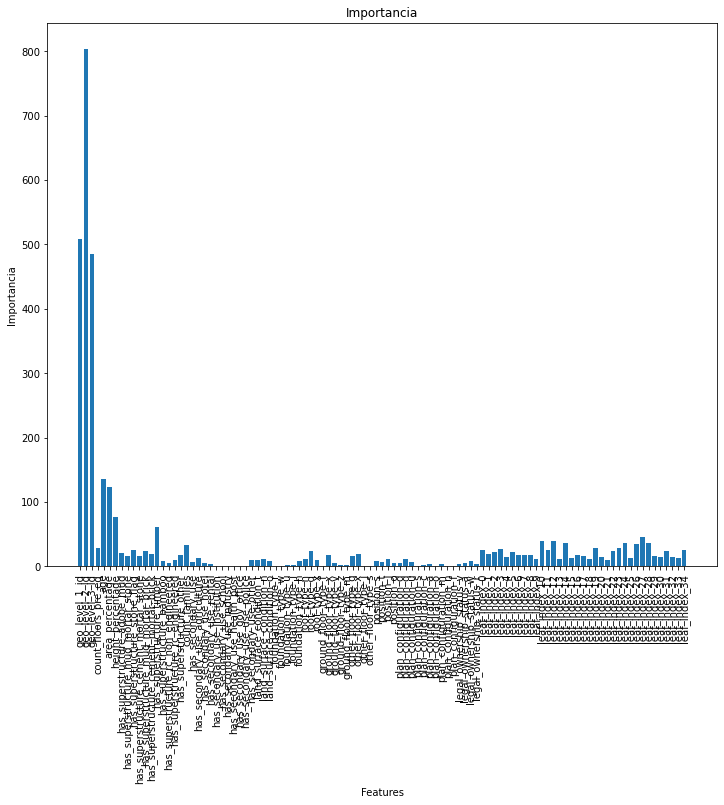

In [11]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, lgb_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia')
plt.show()